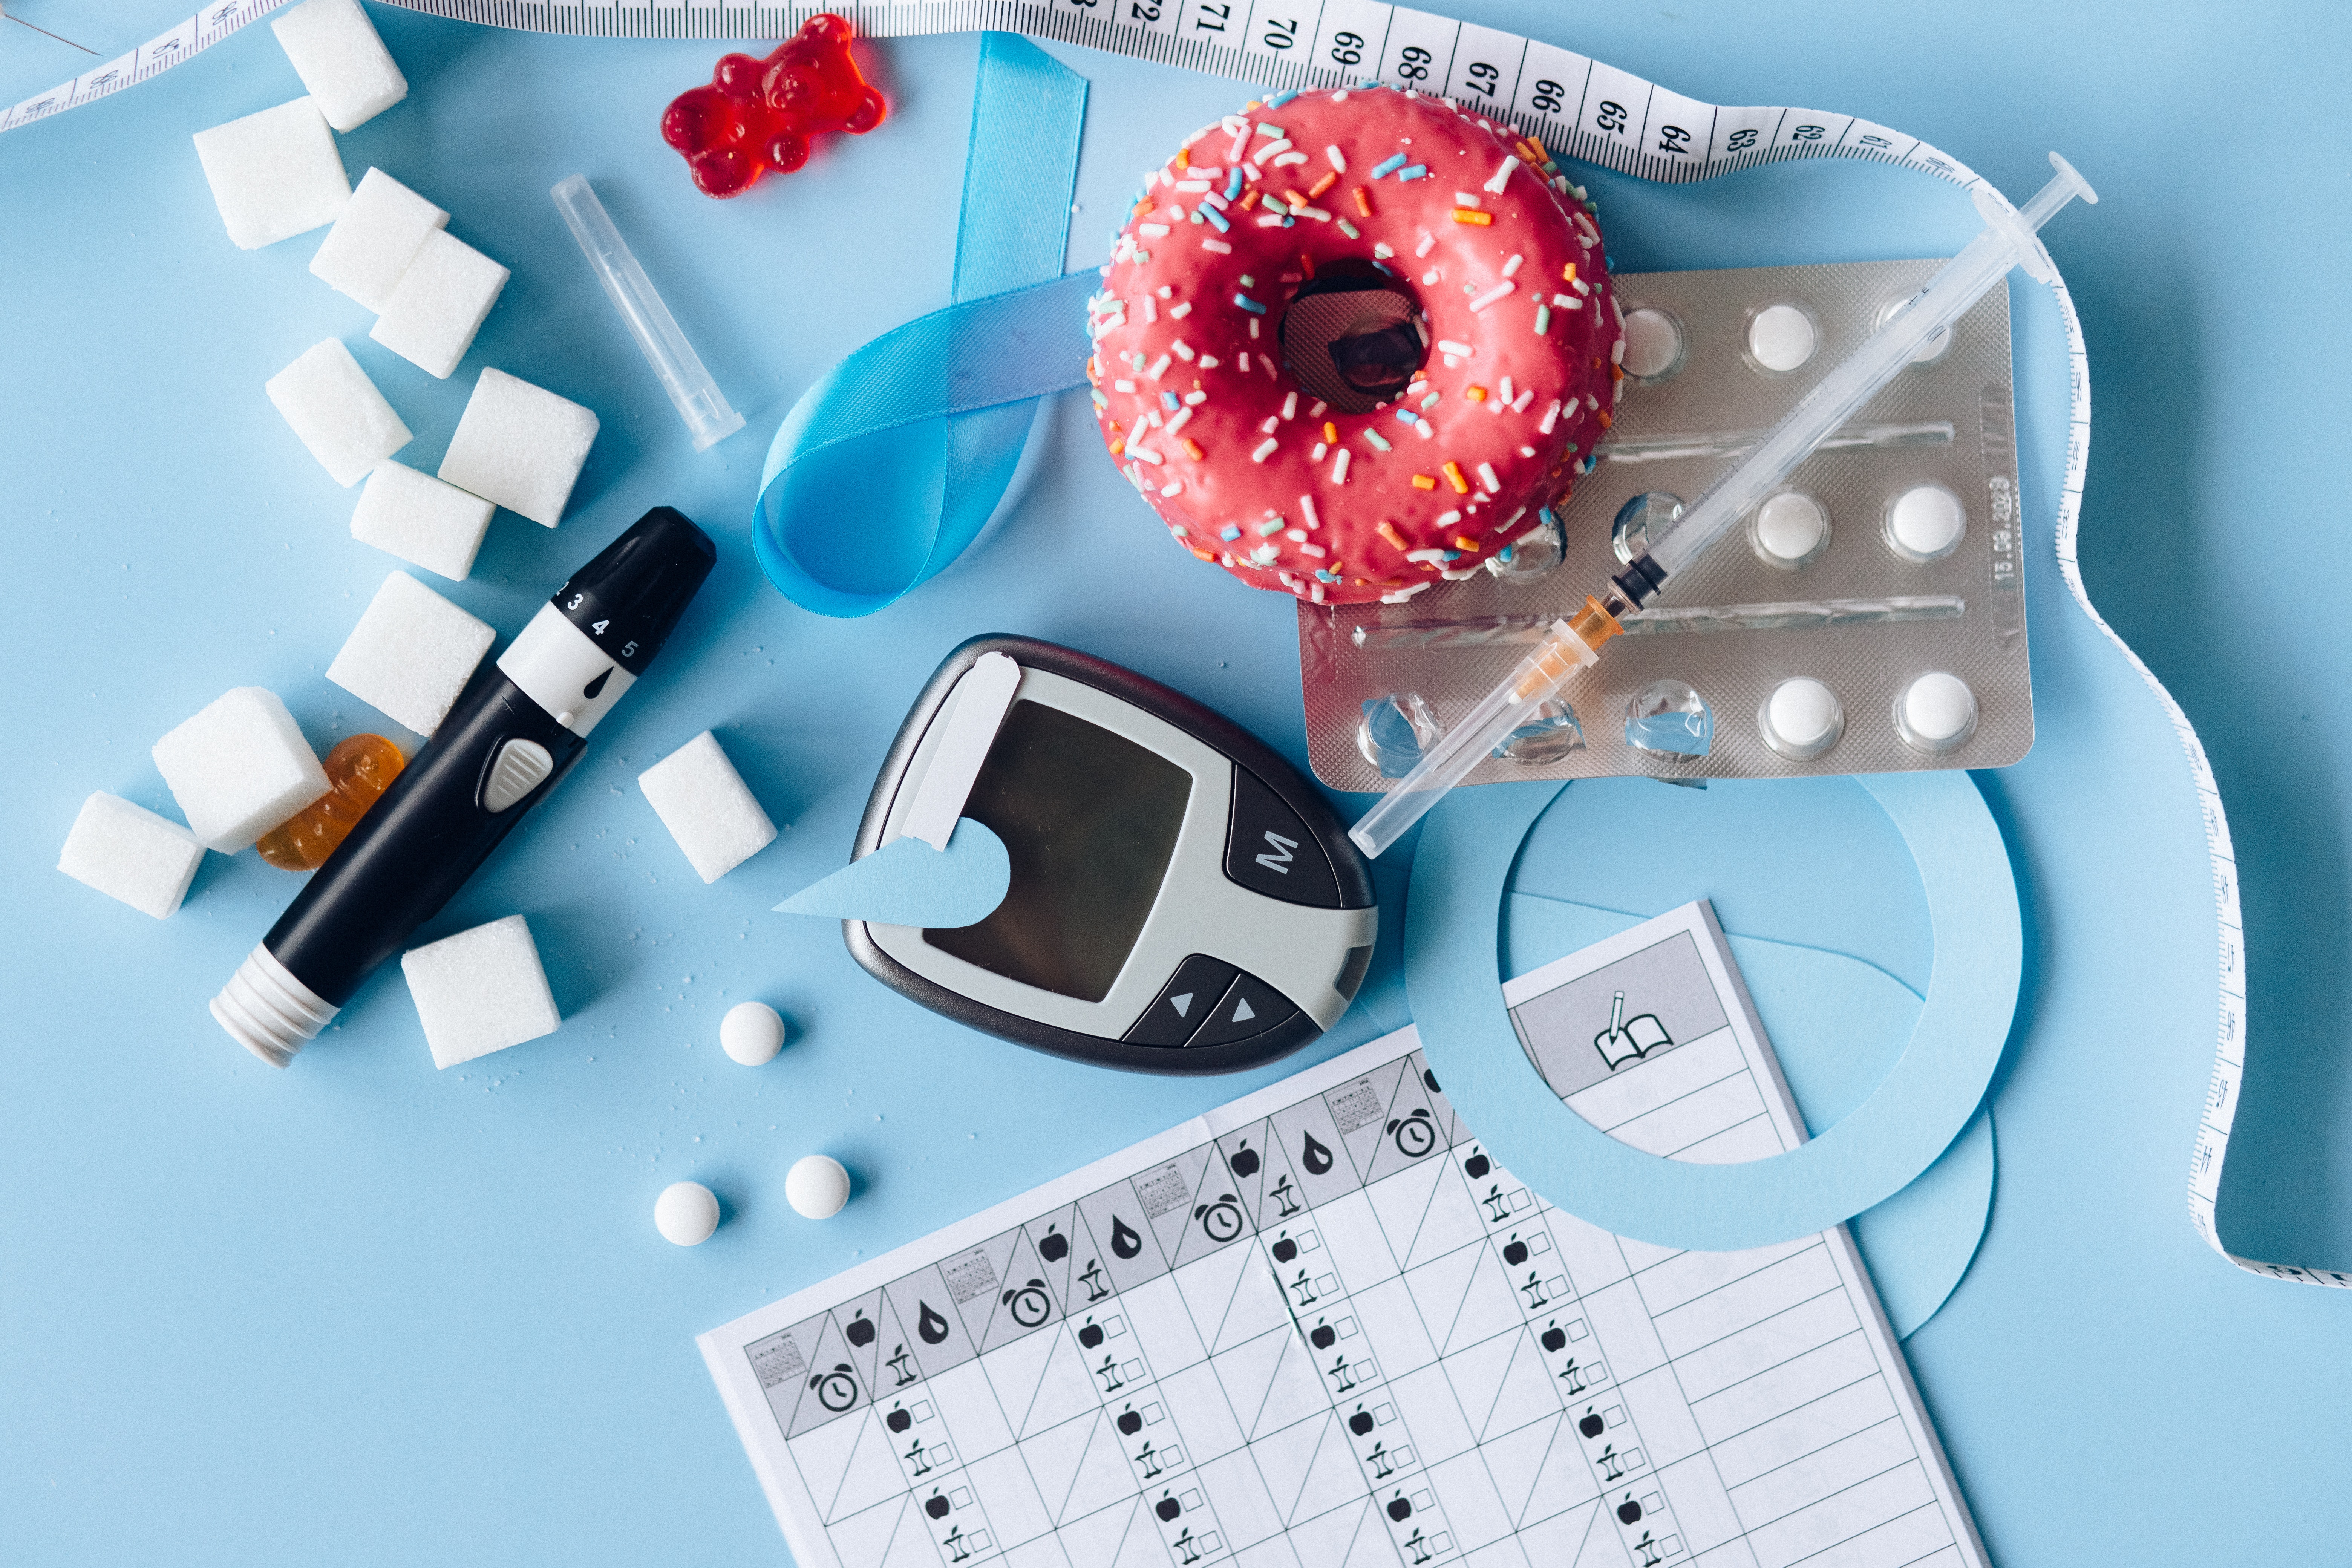

# IMPORTING REQUIRED LIBRARIES

In [22]:
# manipulation et analyse de données
import pandas as pd

# calculs numériques, tableaux et matrices
import numpy as np

# visualisation de données interactives
import matplotlib.pyplot as plt

# biblio de visualisation basé sur matplotlib
import seaborn as sns

- Pandas: Data analysis and manipulation library for working with structured data using Data Frame and Series.
- NumPy: Numerical computing library supporting large, multi-dimensional arrays and matrices, with high-level mathematical functions.
- Matplotlib: Comprehensive plotting library providing interface for creating various plots like line, scatter, bar, and histograms.
- Seaborn: Statistical data visualization library for creating attractive and informative graphics, based on Matplotlib.

# IMPORTING IMPORTANT LIBRARIES FOR PREDICTION

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

- Train Test Split: Technique for splitting data into training and testing sets to assess model performance.
- Logistic Regression: Method for predicting the probability of a binary outcome using the logistic function.
- Accuracy: Metric measuring the proportion of correctly classified instances in a classification model.
- Sklearn: Python's Scikit-learn, a powerful machine learning library providing tools for data analysis and model building.

# LOADING THE DATASET

In [24]:
data = pd.read_csv("../data/diabetes.csv")

In [25]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# CHECKING FOR MISSING VALUES

In [26]:
data.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

<Axes: >

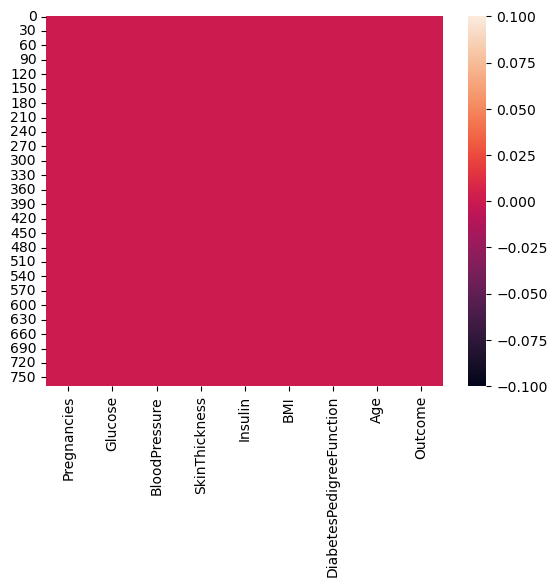

In [27]:
sns.heatmap(data.isnull())

# CORRELATION MATRIX

In [28]:
correlation = data.corr()

In [29]:
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

## Visualizing

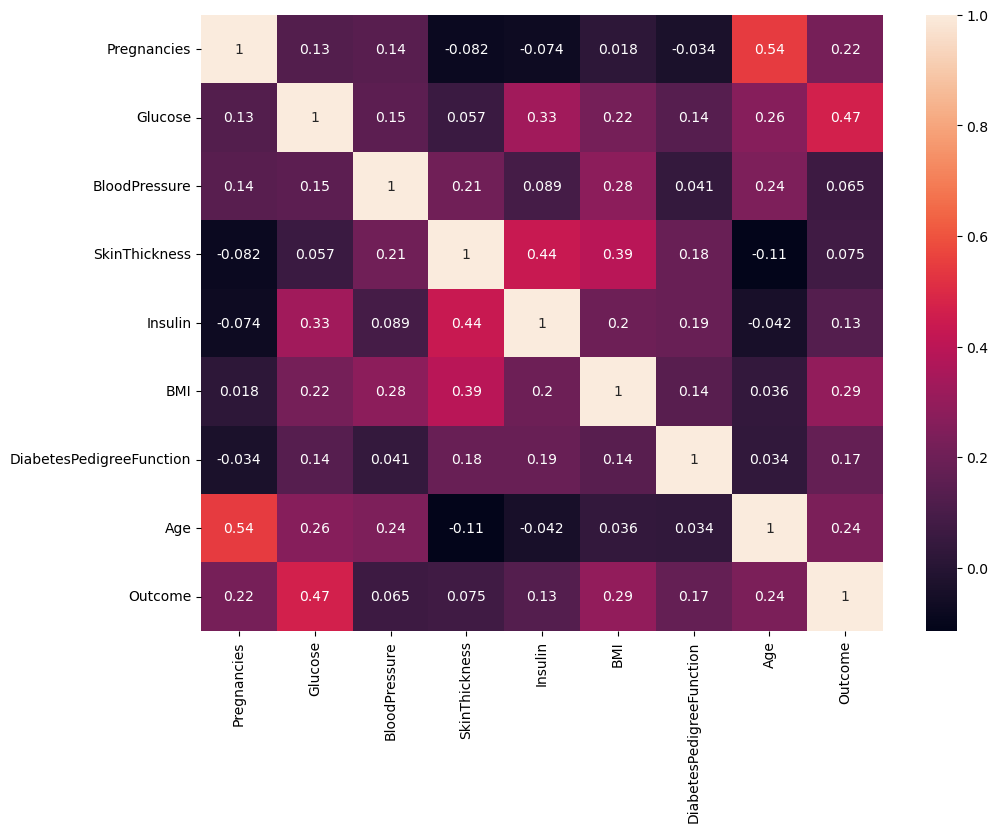

In [30]:
plt.figure(figsize=(11,8))
sns.heatmap(correlation,annot=True)
plt.show()

In [31]:
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\ayoub\AppData\Local\Temp\ipykernel_13676\2354559417.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


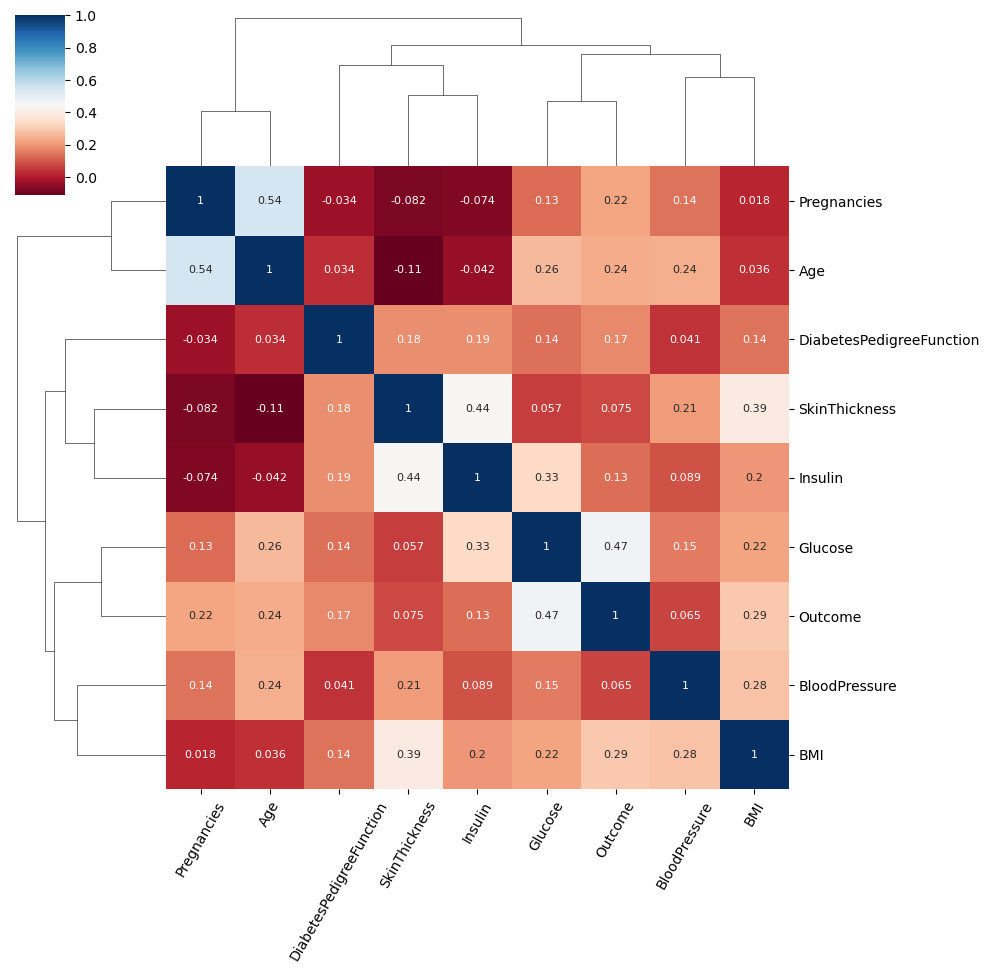

In [32]:
g = sns.clustermap(correlation, 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

# TRAINING THE MODEL WITH THE HELP OF TRAIN TEST SPLIT

In [33]:
X = data.drop("Outcome", axis=1)
y = data['Outcome']

In [34]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [35]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- In X all the independent variables are stored
- In Y the predictor variable(“OUTCOME”) is stored.
- Train-test split is a technique used in machine learning to assess model performance. It divides the dataset into a training set and a testing set, with a 0.2 test size indicating that 20% of the data is used for testing and 80% for training.

# Training the model

In [84]:
model = LogisticRegression()

Fitting the X train and y train data into the variable called model

In [85]:
model.fit(X_train, y_train)

C:\Users\ayoub\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Making Prediction

In [86]:
prediction = model.predict(X_test)

In [87]:
print(prediction)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0]


After training the model, predictions are made using the test data, which comprises 20% of the total dataset.

In [88]:
accuracy = accuracy_score(prediction, y_test)

In [89]:
print(accuracy)

0.8116883116883117


The accuracy of the model is then calculated and determined.